<a href="https://colab.research.google.com/github/kaushlendra0607/js-amazone/blob/main/AIML/CampusX/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving Titanic.csv to Titanic.csv


In [3]:
df = pd.read_csv('Titanic.csv')

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S


# 📘 Understanding Data Splitting & Types in Scikit-Learn

## 1. Arguments of `train_test_split`
The function `train_test_split` from `sklearn.model_selection` controls how your data is divided. Here is what it accepts:

* **`*arrays` (Inputs):**
    * The first arguments are the sequences you want to split (usually `X` and `y`).
    * You can pass lists, numpy arrays, or pandas DataFrames/Series.
    * *Key Rule:* `X` and `y` must have the **same number of rows**.

* **`test_size` (float or int):**
    * If **float** (e.g., `0.2`): Represents the *percentage* of data to use for testing (0.2 = 20%).
    * If **int** (e.g., `50`): Represents the absolute *number* of rows to use for testing.
    * *Default:* If not specified, it usually defaults to 0.25 (25%).

* **`random_state` (int):**
    * Controls the shuffling applied to the data before splitting.
    * `random_state=42` (or any number): Ensures reproducible output. You get the **exact same split** every time you run the code.
    * `None`: You get a different random split every time.

* **`shuffle` (bool, default=True):**
    * Whether or not to shuffle the data before splitting.
    * Usually `True` to remove any pre-existing order (e.g., if data is sorted by date).

---

## 2. The "Bracket Mystery": Series vs. DataFrame
Confusion often arises between single `[]` and double `[[]]` brackets.

| Syntax | Type | Shape | Description |
| :--- | :--- | :--- | :--- |
| **`df['Fare']`** | `pandas.Series` | `(891,)` | **1D Array.** Just a list of numbers with an index. Scikit-learn often *complains* if you use this for Features (X) because it expects a 2D table. |
| **`df[['Fare']]`** | `pandas.DataFrame` | `(891, 1)` | **2D Table.** Even though it has only one column, it is still treated as a table (matrix). Scikit-learn *loves* this format for Features (X). |

> **Rule of Thumb:**
> * **Features (X):** Always use **2D** (DataFrames or 2D arrays). Even if you only have one feature, use `[['Fare']]`.
> * **Target (y):** Usually **1D** (Series or 1D arrays). `df['Survived']` is perfect here.

---

## 3. What exactly are `X_train`, `y_test`, etc?
The `train_test_split` function preserves your input data type.

* **If you put in a DataFrame:** `X_train` and `X_test` will be **DataFrames**.
* **If you put in a Numpy Array:** They will be **Numpy Arrays**.
* **If you put in a List:** They will be **Lists**.

**In your specific case:**
* **`X_train`**: A pandas **DataFrame** containing 80% of the rows and all feature columns.
* **`X_test`**: A pandas **DataFrame** containing the remaining 20% of rows.
* **`y_train`**: A pandas **Series** (1D) containing the labels (0 or 1) corresponding to `X_train`.
* **`y_test`**: A pandas **Series** (1D) containing the labels corresponding to `X_test`.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 1. Separate Features (X) and Target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

Numerical Shape Check:
Original Data Shape:    (712, 1)
Transformed Data Shape: (712, 1)
------------------------------


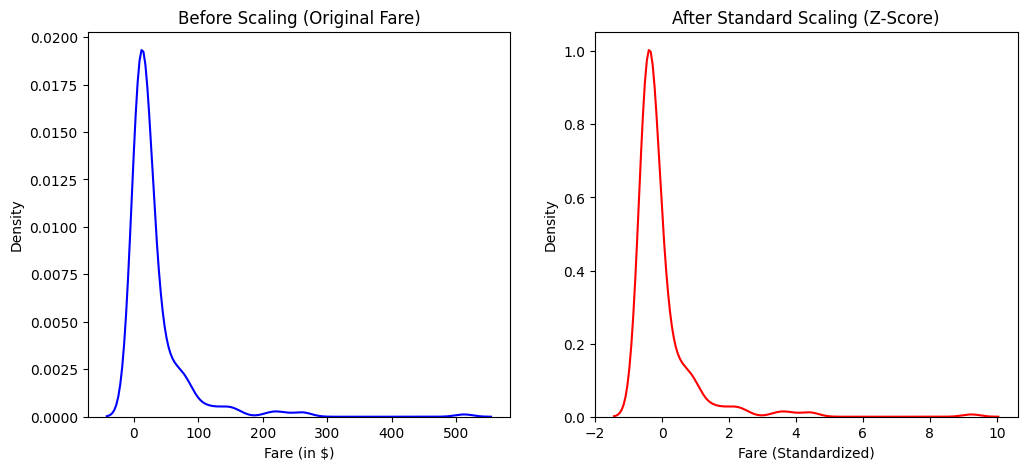

In [28]:
# 1. Let's re-split to get fresh original data (Just for this visualization)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply Scaling to a copy (so we can compare side-by-side)
X_train_scaled = X_train_orig.copy()
col_to_scale = 'Fare'
X_train_scaled[col_to_scale] = scaler.fit_transform(X_train_orig[[col_to_scale]])
X_test_scaled = scaler.transform(X_test_orig[['Fare']])

# --- PRINT NUMERICAL SHAPE ---
print("Numerical Shape Check:")
print(f"Original Data Shape:    {X_train_orig[[col_to_scale]].shape}")
print(f"Transformed Data Shape: {X_train_scaled[[col_to_scale]].shape}")
print("-" * 30)

# --- VISUALIZATION CODE ---
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot 1: Before Scaling
ax1.set_title('Before Scaling (Original Fare)')
sns.kdeplot(X_train_orig[col_to_scale], ax=ax1, color='blue')
ax1.set_xlabel('Fare (in $)')

# Plot 2: After Scaling
ax2.set_title('After Standard Scaling (Z-Score)')
sns.kdeplot(X_train_scaled[col_to_scale], ax=ax2, color='red')
ax2.set_xlabel('Fare (Standardized)')

plt.show()

#Here the accuracy wont be different because scaling is not much helping in linear regression. It matters a lot in algo like KNN.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- MODEL 1: Using Raw Data (Untransformed) ---
lr = LogisticRegression()
# Training on raw 'Fare'
lr.fit(X_train_orig[['Fare']], y_train_orig)
y_pred = lr.predict(X_test_orig[['Fare']])
print(f"Accuracy with Actual Data: {accuracy_score(y_test_orig, y_pred):.4f}")

# --- MODEL 2: Using Scaled Data (Transformed) ---
lr_scaled = LogisticRegression()
# Training on Scaled 'Fare'
lr_scaled.fit(X_train_scaled[['Fare']], y_train_orig)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print(f"Accuracy with Scaled Data: {accuracy_score(y_test_orig, y_pred_scaled):.4f}")

Accuracy with Actual Data: 0.6536
Accuracy with Scaled Data: 0.6536


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
